In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import functions_library as fl

In [2]:
df=pd.read_csv('df_to_use.csv')
df.head()

,Unnamed: 0,URL,Review_Title,Author,Rating,Review_text,Review_helpful,month,dayofweek,nameProvided,review_word_count,summary_word_count
0,0,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,It s a logitech Definitely worth buying it,Aqib Mehmood,5,A really awesome keyboard i was actually go...,77,8,4,1,92,8
1,1,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Great deal got it for With Lightening ...,Chauhan,4,I know its costly but its worth your money ...,55,3,1,1,156,8
2,2,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Loved it,Smok3y,5,I had been contemplating to buy this for a l...,18,12,2,1,102,2
3,3,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Not a good purchase please read description,Kumar Saharsh,1,SO Very very small keys For fast typers w...,11,6,3,1,112,7
4,4,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Good only when new,Amazon Customer,2,Good to use keyboard while it is new but it...,15,10,5,0,67,4


In [3]:

non_tokens_df=df.select_dtypes(include=['int32','int64'])
non_tokens_df=non_tokens_df.drop("Unnamed: 0",axis=1)
non_tokens_df.head()

,Rating,Review_helpful,month,dayofweek,nameProvided,review_word_count,summary_word_count
0,5,77,8,4,1,92,8
1,4,55,3,1,1,156,8
2,5,18,12,2,1,102,2
3,1,11,6,3,1,112,7
4,2,15,10,5,0,67,4


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
mm = MinMaxScaler()

In [6]:
#fit transform data using minmaxscaler
df2 = mm.fit_transform(non_tokens_df)

In [7]:
#put the scaled into a dataframe
df_scaled = pd.DataFrame(df2, columns = non_tokens_df.columns)

In [8]:
df_scaled.head()

,Rating,Review_helpful,month,dayofweek,nameProvided,review_word_count,summary_word_count
0,1.00,0.008579,0.636364,0.666667,1.0,0.059091,0.258065
1,0.75,0.006128,0.181818,0.166667,1.0,0.100649,0.258065
2,1.00,0.002006,1.000000,0.333333,1.0,0.065584,0.064516
3,0.00,0.001226,0.454545,0.500000,1.0,0.072078,0.225806
4,0.25,0.001671,0.818182,0.833333,0.0,0.042857,0.129032


In [9]:
from sklearn.cluster import KMeans

In [10]:
k_values = range(8,32)
inertia_scores = []
for k in k_values:
    #instantiate
    kmeans_model = KMeans(n_clusters=k, init='k-means++', n_init=1, verbose=1)
    kmeans_model.fit(df_scaled)
    inertia = kmeans_model.inertia_
    inertia_scores.append(inertia)

Initialization complete
Iteration 0, inertia 1608.878359611503
Iteration 1, inertia 1229.642513921657
Iteration 2, inertia 1102.3852423383748
Iteration 3, inertia 1068.9015672898552
Iteration 4, inertia 1063.4320868337827
Iteration 5, inertia 1059.5043094155433
Iteration 6, inertia 1057.091372613233
Iteration 7, inertia 1056.068611157926
Iteration 8, inertia 1055.319229266923
Iteration 9, inertia 1054.6074989606934
Iteration 10, inertia 1054.5027805543687
Iteration 11, inertia 1054.4693285562298
Iteration 12, inertia 1054.4380007446657
Iteration 13, inertia 1054.3815603369153
Iteration 14, inertia 1054.2237619098216
Iteration 15, inertia 1053.8165189707163
Iteration 16, inertia 1053.0252229132382
Iteration 17, inertia 1051.5045616085426
Iteration 18, inertia 1049.6090411411258
Iteration 19, inertia 1048.121117059508
Iteration 20, inertia 1047.9300197750601
Iteration 21, inertia 1047.8981623650063
Converged at iteration 21: center shift 5.975488337831154e-06 within tolerance 6.363334664

Iteration 11, inertia 480.1632743262813
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 630.6277557893146
Iteration 1, inertia 489.65535611181497
Iteration 2, inertia 467.6113557137744
Iteration 3, inertia 465.0640146193913
Iteration 4, inertia 464.00534213208635
Iteration 5, inertia 463.6931159285077
Iteration 6, inertia 463.6549018260183
Iteration 7, inertia 463.6132326417003
Iteration 8, inertia 463.5917346285878
Iteration 9, inertia 463.58124393936794
Iteration 10, inertia 463.5761452305343
Iteration 11, inertia 463.5627257812993
Iteration 12, inertia 463.5177452307954
Iteration 13, inertia 463.49592695526337
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 654.1706812131421
Iteration 1, inertia 491.33150343077506
Iteration 2, inertia 470.403041891645
Iteration 3, inertia 461.6703773456467
Iteration 4, inertia 459.5438866220548
Iteration 5, inertia 458.6789936603396
Iteration 6, inertia 456.90082

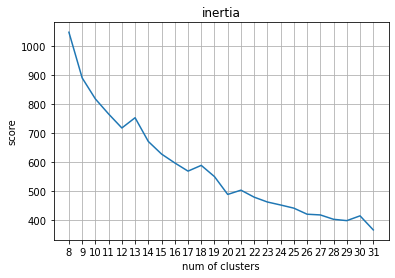

In [11]:
plt.figure()
plt.plot(k_values, inertia_scores)
plt.xlabel('num of clusters')
plt.ylabel('score')
plt.title('inertia')
plt.xticks(k_values)
plt.grid()
#plt.ylim(0,580000)
plt.show()

In [12]:
kmeans_model25 = KMeans(n_clusters=20, init='k-means++', n_init=1, verbose=1)
#fitting KMeans on first 350 PCs
kmeans_model25.fit(df_scaled)

Initialization complete
Iteration 0, inertia 775.8205560946092
Iteration 1, inertia 589.5738311899278
Iteration 2, inertia 553.0616369453555
Iteration 3, inertia 546.4848057254126
Iteration 4, inertia 539.6168174989764
Iteration 5, inertia 533.3760801570621
Iteration 6, inertia 529.4748327254526
Iteration 7, inertia 528.5078565965348
Iteration 8, inertia 527.5382091908426
Iteration 9, inertia 526.9473425518473
Iteration 10, inertia 526.9162372451888
Iteration 11, inertia 526.8288622027611
Iteration 12, inertia 526.6335681461574
Iteration 13, inertia 524.4796287136429
Iteration 14, inertia 519.1131116493095
Iteration 15, inertia 518.6898807212947
Iteration 16, inertia 518.6411786021287
Iteration 17, inertia 518.6248870491771
Iteration 18, inertia 518.6176704760801
Converged at iteration 18: center shift 1.108481377327916e-06 within tolerance 6.3633346645858555e-06.


KMeans(n_clusters=20, n_init=1, verbose=1)

In [13]:
df_scaled['cluster']=kmeans_model25.labels_

In [14]:
df_scaled.head()

,Rating,Review_helpful,month,dayofweek,nameProvided,review_word_count,summary_word_count,cluster
0,1.00,0.008579,0.636364,0.666667,1.0,0.059091,0.258065,2
1,0.75,0.006128,0.181818,0.166667,1.0,0.100649,0.258065,4
2,1.00,0.002006,1.000000,0.333333,1.0,0.065584,0.064516,0
3,0.00,0.001226,0.454545,0.500000,1.0,0.072078,0.225806,12
4,0.25,0.001671,0.818182,0.833333,0.0,0.042857,0.129032,3


In [15]:
#rating
df_scaled.groupby('cluster').mean().iloc[:,0].sort_values(ascending=False)

cluster
0     1.000000
8     1.000000
13    0.931272
4     0.928021
2     0.922414
11    0.920276
18    0.905914
10    0.861895
6     0.839527
16    0.750000
17    0.701389
5     0.464744
1     0.401449
19    0.240775
7     0.203000
3     0.063988
15    0.042892
9     0.030641
12    0.017760
14    0.000000
Name: Rating, dtype: float64

In [16]:
#review Helpful
df_scaled.groupby('cluster').mean().iloc[:,1].sort_values(ascending=False)

cluster
5     0.003472
9     0.001005
15    0.000825
2     0.000670
17    0.000620
14    0.000399
0     0.000393
16    0.000375
3     0.000213
13    0.000207
1     0.000116
8     0.000115
4     0.000070
12    0.000066
7     0.000049
10    0.000042
18    0.000036
19    0.000033
6     0.000016
11    0.000013
Name: Review_helpful, dtype: float64

In [17]:
#nameProvided
df_scaled.groupby('cluster').mean().iloc[:,4].sort_values(ascending=False)

cluster
0     1.0
1     1.0
18    1.0
17    1.0
16    1.0
15    1.0
14    1.0
13    1.0
12    1.0
11    1.0
19    1.0
9     1.0
8     1.0
7     1.0
5     1.0
4     1.0
2     1.0
6     0.0
3     0.0
10    0.0
Name: nameProvided, dtype: float64

In [18]:
#word_count
df_scaled.groupby('cluster').mean().iloc[:,5].sort_values(ascending=False)

cluster
2     0.031435
5     0.028869
19    0.025080
1     0.024832
9     0.024136
7     0.022790
15    0.022702
3     0.022604
12    0.021971
14    0.021434
17    0.019894
16    0.019437
18    0.014158
0     0.013937
4     0.013562
10    0.012550
8     0.012508
13    0.011608
6     0.010530
11    0.010212
Name: review_word_count, dtype: float64

I cluster interessanti su cui concentrasi sono: 8, 0 e 11

In [19]:
df_cluster_8=df_scaled.loc[df_scaled["cluster"]==8]
df_cluster_0=df_scaled.loc[df_scaled["cluster"]==0]
df_cluster_11=df_scaled.loc[df_scaled["cluster"]==11]

final_df=pd.concat([df_cluster_8,df_cluster_0,df_cluster_11],axis=0)
final_df.shape

(2420, 8)

In [20]:
df_etichettato=pd.read_csv("finalReview.csv")
df_etichettato.head()

,Unnamed: 0,Date,URL,Review_Title,Author,Rating,Review_text,Review_helpful,Sentiment,Subjectivity,...,Adv_Count,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Rev_Type
0,0,Reviewed in India on 10 August 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,It s a logitech Definitely worth buying it,Aqib Mehmood,5,A really awesome keyboard i was actually go...,77,0.359722,0.552778,...,6.0,4.0,3.0,2.0,2.0,1.0,9.0,0.706522,13.0,1
1,1,Reviewed in India on 27 March 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Great deal got it for With Lightening ...,Chauhan,4,I know its costly but its worth your money ...,55,0.233125,0.468542,...,10.0,4.0,7.0,2.0,2.0,1.0,6.0,0.666667,16.0,1
2,2,Reviewed in India on 19 December 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Loved it,Smok3y,5,I had been contemplating to buy this for a l...,18,0.338750,0.568750,...,3.0,4.0,7.0,1.0,2.0,0.0,9.0,0.735294,22.0,1
3,3,Reviewed in India on 25 June 2020,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Not a good purchase please read description,Kumar Saharsh,1,SO Very very small keys For fast typers w...,11,0.139083,0.507840,...,6.0,4.0,8.0,1.0,2.0,2.0,5.0,0.687500,22.0,1
4,4,Reviewed in India on 27 October 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Good only when new,Amazon Customer,2,Good to use keyboard while it is new but it...,15,0.165427,0.698140,...,4.0,2.0,9.0,2.0,1.0,1.0,3.0,0.731343,28.0,0


In [40]:
final_df["review_text"]=df_etichettato["Review_text"]
final_df["summary"]=df_etichettato["Review_Title"]
final_df["Rev_Type"]=df_etichettato["Rev_Type"]
final_df=final_df.reset_index()
final_df.shape

(2420, 13)

In [43]:
rev_type_1=final_df.loc[final_df["Rev_Type"]==1]
rev_type_1.shape

(1069, 13)

In [22]:
#obtaining number of tokens using tf idf vectorization based on varying min_df values for review text 
#using lemmatization or stemming
min_df_list = range(20,600,40)
numTokens_lem = []
numTokens_stem = []

for i in min_df_list:
    
    #getting number of tokens using tf idf vectorizer using lemmatization or stemming
    print(f'beginning tokenization with min_df = {i}')
    tokens_l = (fl.tfidf(final_df['review_text'], tokenizer=fl.spl_tokenizer, min_df=i, ngram_range=(1,2))).shape[1]
    print(f'vectorization with lemmatization for min_df = {i} complete')
    tokens_s = (fl.tfidf(final_df['review_text'], tokenizer=fl.sps_tokenizer, min_df=i, ngram_range=(1,2))).shape[1]
    print(f'vectorization with stemming for min_df = {i} complete')

    #appending number of tokens to the appropriate list
    numTokens_lem.append(tokens_l)
    numTokens_stem.append(tokens_s)
    print(f'number of tokens appending to corresponding list. min_df = {i} complete')

beginning tokenization with min_df = 20


C:\Users\bucco\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


vectorization with lemmatization for min_df = 20 complete
vectorization with stemming for min_df = 20 complete
number of tokens appending to corresponding list. min_df = 20 complete
beginning tokenization with min_df = 60
vectorization with lemmatization for min_df = 60 complete
vectorization with stemming for min_df = 60 complete
number of tokens appending to corresponding list. min_df = 60 complete
beginning tokenization with min_df = 100
vectorization with lemmatization for min_df = 100 complete
vectorization with stemming for min_df = 100 complete
number of tokens appending to corresponding list. min_df = 100 complete
beginning tokenization with min_df = 140
vectorization with lemmatization for min_df = 140 complete
vectorization with stemming for min_df = 140 complete
number of tokens appending to corresponding list. min_df = 140 complete
beginning tokenization with min_df = 180
vectorization with lemmatization for min_df = 180 complete
vectorization with stemming for min_df = 180

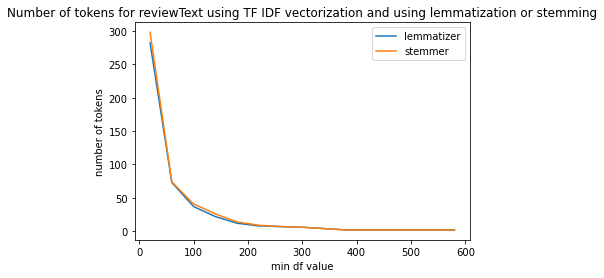

In [23]:
#plot num tokens for each tokenizer with varying min df values
plt.figure()
plt.plot(min_df_list, numTokens_lem, label='lemmatizer')
plt.plot(min_df_list, numTokens_stem, label='stemmer')
plt.legend()
plt.xlabel('min df value')
plt.ylabel('number of tokens')
plt.title('Number of tokens for reviewText using TF IDF vectorization and using lemmatization or stemming')
plt.show()

In [24]:
#obtaining number of tokens using tf idf vectorization based on varying min_df values for summary text 
#using lemmatization or stemming
min_df_list2 = range(10,300,15)
numTokens_lem2 = []
numTokens_stem2 = []

for i in min_df_list2:
    
    #getting number of tokens using tf idf vectorizer using lemmatization or stemming
    print(f'beginning tokenization with min_df = {i}')
    tokens_l = (fl.tfidf(final_df['summary'], tokenizer=fl.spl_tokenizer, min_df=i, ngram_range=(1,2))).shape[1]
    print(f'vectorization with lemmatization for min_df = {i} complete')
    tokens_s = (fl.tfidf(final_df['summary'], tokenizer=fl.sps_tokenizer, min_df=i, ngram_range=(1,2))).shape[1]
    print(f'vectorization with stemming for min_df = {i} complete')

    #appending number of tokens to the appropriate list
    numTokens_lem2.append(tokens_l)
    numTokens_stem2.append(tokens_s)
    print(f'number of tokens appending to corresponding list. min_df = {i} complete')

beginning tokenization with min_df = 10
vectorization with lemmatization for min_df = 10 complete
vectorization with stemming for min_df = 10 complete
number of tokens appending to corresponding list. min_df = 10 complete
beginning tokenization with min_df = 25
vectorization with lemmatization for min_df = 25 complete
vectorization with stemming for min_df = 25 complete
number of tokens appending to corresponding list. min_df = 25 complete
beginning tokenization with min_df = 40
vectorization with lemmatization for min_df = 40 complete
vectorization with stemming for min_df = 40 complete
number of tokens appending to corresponding list. min_df = 40 complete
beginning tokenization with min_df = 55
vectorization with lemmatization for min_df = 55 complete
vectorization with stemming for min_df = 55 complete
number of tokens appending to corresponding list. min_df = 55 complete
beginning tokenization with min_df = 70
vectorization with lemmatization for min_df = 70 complete
vectorization 

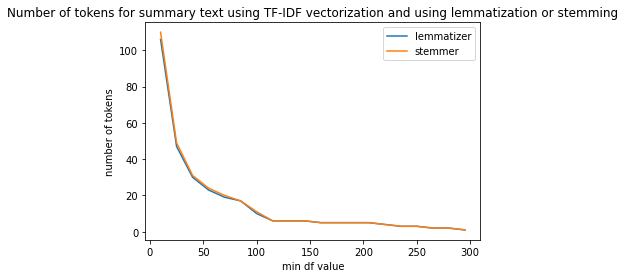

In [25]:
#plot num tokens for each tokenizer with varying min df values for summary text
plt.figure()
plt.plot(min_df_list2, numTokens_lem2, label='lemmatizer')
plt.plot(min_df_list2, numTokens_stem2, label='stemmer')
plt.legend()
plt.xlabel('min df value')
plt.ylabel('number of tokens')
plt.title('Number of tokens for summary text using TF-IDF vectorization and using lemmatization or stemming')
plt.show()

In [27]:
review_tokens = fl.tfidf(final_df['review_text'], tokenizer=fl.spl_tokenizer, ngram_range=(1,2), min_df=50)
summary_tokens = fl.tfidf(final_df['summary'], tokenizer=fl.spl_tokenizer, ngram_range=(1,2), min_df=25)
review_tokens.shape

C:\Users\bucco\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(2420, 99)

In [28]:
df_scaled_non_token=final_df.iloc[:,0:7]

df_final = pd.concat([df_scaled_non_token, review_tokens, summary_tokens], axis = 1)

In [39]:
df_final.shape

(2420, 154)

In [32]:
#we begin by trying to determine the optimal number of clusters by looking at inertia scores
#cycle through different K values and append inertia score to list
k_values = range(1,32)
inertia_scores = []

for k in k_values:
    #instantiate
    kmeans_model = KMeans(n_clusters=k,init='k-means++', n_init=1, verbose=1)
    kmeans_model.fit(df_final)
    #get scores and append them
    inertia = kmeans_model.inertia_
    #append score
    inertia_scores.append(inertia)

C:\Users\bucco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


Initialization complete
Iteration 0, inertia 18073390050.51598.
Iteration 1, inertia 17732874887.782814.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 8561469038.687104
Iteration 1, inertia 5770637310.426347
Iteration 2, inertia 5155964983.296943
Iteration 3, inertia 4918751003.310864
Iteration 4, inertia 4810842543.350193
Iteration 5, inertia 4753329477.494479
Iteration 6, inertia 4717024022.790672
Iteration 7, inertia 4703980527.242437
Iteration 8, inertia 4696491672.920028
Iteration 9, inertia 4693188209.440774
Iteration 10, inertia 4692579885.045963
Iteration 11, inertia 4692501568.290789
Iteration 12, inertia 4692423874.127475
Iteration 13, inertia 4692413413.036881
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 2067723928.3869298
Iteration 1, inertia 1886266622.5871034
Iteration 2, inertia 1831515308.551462
Iteration 3, inertia 1822422570.6633613
Iteration 4, inertia 1820572417.688308
Iterat

Iteration 0, inertia 284611398.72942746
Iteration 1, inertia 247694798.33211526
Iteration 2, inertia 240159418.12592497
Iteration 3, inertia 234757593.4822003
Iteration 4, inertia 231090698.58382076
Iteration 5, inertia 228271424.0962873
Iteration 6, inertia 226051396.48897645
Iteration 7, inertia 224610492.38238513
Iteration 8, inertia 223551740.580124
Iteration 9, inertia 222375811.40537685
Iteration 10, inertia 220895371.68092847
Iteration 11, inertia 219652218.44009405
Iteration 12, inertia 218744999.3887883
Iteration 13, inertia 217375621.1229849
Iteration 14, inertia 216257912.07732406
Iteration 15, inertia 215375316.73567972
Iteration 16, inertia 214634691.68180895
Iteration 17, inertia 214102535.42138398
Iteration 18, inertia 213670562.84110966
Iteration 19, inertia 213375559.01935554
Iteration 20, inertia 213039254.23031333
Iteration 21, inertia 212516812.06493512
Iteration 22, inertia 212106313.2046787
Iteration 23, inertia 211785527.44846356
Iteration 24, inertia 211636623.9

Initialization complete
Iteration 0, inertia 61915400.004983924
Iteration 1, inertia 50888774.25428127
Iteration 2, inertia 49661050.67427733
Iteration 3, inertia 49293717.20410089
Iteration 4, inertia 49135847.37434965
Iteration 5, inertia 49011163.65646057
Iteration 6, inertia 48884626.907822564
Iteration 7, inertia 48776695.372771546
Iteration 8, inertia 48645048.37345104
Iteration 9, inertia 48584486.744577214
Iteration 10, inertia 48534968.01447815
Iteration 11, inertia 48507653.262753956
Iteration 12, inertia 48456338.03392266
Iteration 13, inertia 48413353.77146325
Iteration 14, inertia 48386389.80674447
Iteration 15, inertia 48358189.54651332
Iteration 16, inertia 48336807.60488256
Iteration 17, inertia 48327532.90594488
Iteration 18, inertia 48314923.11136943
Iteration 19, inertia 48301976.68288607
Iteration 20, inertia 48297196.895993784
Iteration 21, inertia 48292689.554196686
Iteration 22, inertia 48290644.741233155
Iteration 23, inertia 48289029.115869075
Iteration 24, ine

Iteration 14, inertia 26715222.418235306
Iteration 15, inertia 26704689.03059724
Iteration 16, inertia 26697858.737190384
Iteration 17, inertia 26696294.359110743
Converged at iteration 17: center shift 4.367437451347387 within tolerance 4.789303432124132.
Initialization complete
Iteration 0, inertia 33287122.473763138
Iteration 1, inertia 28824950.978760067
Iteration 2, inertia 28246911.03265332
Iteration 3, inertia 28029893.636169173
Iteration 4, inertia 27888076.98881536
Iteration 5, inertia 27768524.546239313
Iteration 6, inertia 27647984.28186175
Iteration 7, inertia 27567548.618889626
Iteration 8, inertia 27521931.724895746
Iteration 9, inertia 27484008.764061525
Iteration 10, inertia 27433188.69932699
Iteration 11, inertia 27403028.331064876
Iteration 12, inertia 27370268.374421563
Iteration 13, inertia 27355451.814377222
Iteration 14, inertia 27354590.397039145
Iteration 15, inertia 27353365.72975923
Iteration 16, inertia 27352585.75365042
Converged at iteration 16: strict conv

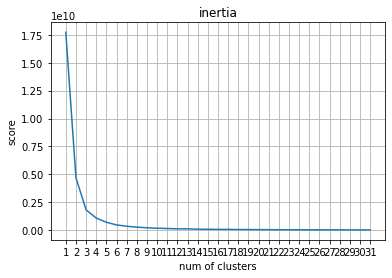

In [33]:
plt.figure()
plt.plot(k_values, inertia_scores)
plt.xlabel('num of clusters')
plt.ylabel('score')
plt.title('inertia')
plt.xticks(k_values)
plt.grid()
#plt.ylim(0,580000)
plt.show()

In [35]:
#instantiate KMeans with 25 clusters
kmeans_model15 = KMeans(n_clusters=2, init='k-means++', n_init=1, verbose=1)
#fitting KMeans on first 350 PCs
kmeans_model15.fit(df_final)

Initialization complete
Iteration 0, inertia 6061292590.839079
Iteration 1, inertia 5005598646.577235
Iteration 2, inertia 4850753671.423988
Iteration 3, inertia 4776757588.28341
Iteration 4, inertia 4733450408.932851
Iteration 5, inertia 4713040618.423625
Iteration 6, inertia 4702351635.520666
Iteration 7, inertia 4695334849.656886
Iteration 8, inertia 4692844788.973344
Iteration 9, inertia 4692579885.045963
Iteration 10, inertia 4692501568.290789
Iteration 11, inertia 4692423874.127472
Iteration 12, inertia 4692413413.036881
Converged at iteration 12: strict convergence.


KMeans(n_clusters=2, n_init=1, verbose=1)

In [44]:
final_df["cluster"]=kmeans_model15.labels_

In [46]:
cluster_1=final_df.loc[final_df["cluster"]==0]
cluster_1.shape

(1546, 13)

In [47]:
cluster_1_rev_type_1=cluster_1.loc[cluster_1["Rev_Type"]==1]
cluster_1_rev_type_1.shape

(703, 13)